# BBM409 Assignment_1



## PART 1: Classification of News Articles

In [2]:
# import necessary libraries
import sys
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from collections import Counter

c:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Implementing k Nearest Neighbor Algorithms

In [2]:
# Euclid distance function for calculating distance between two points to be used for KNN algorithms
def euclid_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [3]:
# My own KNN algorithm class which implemented from scratch
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = np.array([])
        for x in X:
            predictions = np.append(predictions, self._predict(x))
        return predictions

    def _predict(self, x):

        distances = np.array([])

        for x_train in self.X_train :
            distance = euclid_distance(x, x_train)
            distances = np.append(distances, distance)

        k_indices = np.array([])
        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = np.array([])

        for i in k_indices:
            k_nearest_labels = np.append(k_nearest_labels, self.y_train.iloc[i])

        most_common = Counter(k_nearest_labels).most_common()

        return most_common[0][0]

In [4]:
# My own weighted KNN algorithm class which implemented from scratch
class WeightedKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = np.array([])
        for x in X:
            predictions = np.append(predictions, self._predict(x))
        return predictions

    def _predict(self, x):

        distances = np.array([])

        for x_train in self.X_train:
            distance = euclid_distance(x, x_train)
            distances = np.append(distances, distance)

        k_indices = np.argsort(distances)[:self.k]

        weighted_labels = {}

        for i in k_indices:
            label = self.y_train.iloc[i]
            distance = distances[i]

            # Using inverse distance as weight
            weight = 1 / (distance + 1e-5)  # Adding a small value to avoid division by zero

            if label not in weighted_labels:
                weighted_labels[label] = 0
            weighted_labels[label] += weight

        # Find the label with the highest weighted sum
        most_weighted_label = max(weighted_labels, key=weighted_labels.get)

        return most_weighted_label

### Functions to be used later on this experiment

In [5]:
# A function to calculate confusion matrix parameters True Positive, True Negative, False Positive, False Negative
def calculate_confusion_matrix(y_true, y_pred, num_classes):
    # Initialize counts for TP, TN, FP, FN for each class
    tp = [0] * num_classes
    tn = [0] * num_classes
    fp = [0] * num_classes
    fn = [0] * num_classes

    # Iterate over each instance
    for i in range(len(y_true)):
        true_label = y_true[i]
        pred_label = y_pred[i]

        # Update confusion matrix counts based on true and predicted labels
        if true_label == pred_label:
            tp[true_label] += 1
            for j in range(num_classes):
                if j != true_label:
                    tn[j] += 1
        else:
            fp[pred_label] += 1
            fn[true_label] += 1
            for j in range(num_classes):
                if j != true_label and j != pred_label:
                    tn[j] += 1

    return tp, tn, fp, fn

In [6]:
# Changing values inside the tables to numbers which is assigned for each category. (Assigned values will be seen later)
def convert_to_ids(table):
    temp_table = np.empty_like(table)
    for j in range(len(table)):
        temp = table[j]
        temp_table[j] = category_to_id.get(temp)
    return temp_table

In [7]:
# This function calculates and returns accuracy, precision and recall scores according to method to be used.
# While calling this function we use parameters if it is weighted knn or not, if it is stop words deleted or not
# and to decide which method will be used like bigram, unigram or tf-idf.
# This function also takes the neighbour count parameter which will be 1 to 9 for this assignment.
def calculate_scores(train, test, n, b_or_u, stop_removed, wtd):
    X_train_1 = train.clean_text
    y_train_1 = train.Category
    X_test_1 = test.clean_text
    y_test_1 = test.Category

    vec = CountVectorizer(ngram_range=(1, 1))

    if stop_removed:
        if b_or_u == "unigram":
            vec = CountVectorizer(ngram_range=(1, 1), stop_words="english", max_features=100)
        elif b_or_u == "bigram":
            vec = CountVectorizer(ngram_range=(2, 2), stop_words="english", max_features=100)
        elif b_or_u == "tf-idf":
            vec = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, use_idf=True, stop_words="english")
        else:
            print("There is an error in your code")
            sys.exit()
    else:
        if b_or_u == "unigram":
            vec = CountVectorizer(ngram_range=(1, 1), max_features=100)
        elif b_or_u == "bigram":
            vec = CountVectorizer(ngram_range=(2, 2), max_features=100)
        elif b_or_u == "tf-idf":
            vec = TfidfVectorizer(ngram_range=(1, 2),max_features=1000, use_idf=True)
        else:
            print("There is an error in your code")
            sys.exit()

    vec.fit(X_train_1)

    X_transformed = vec.transform(X_train_1)
    X_test_transformed = vec.transform(X_test_1)

    X_transformed = X_transformed.toarray()
    X_test_transformed = X_test_transformed.toarray()

    clf = KNN(k=n)
    if wtd == "yes":  # If weighted knn will be used or not. If it will be used "wtd" will come as "yes" from parameter
        clf = WeightedKNN(k=n)
    clf.fit(X_transformed, y_train_1)
    pred = clf.predict(X_test_transformed)

    y_test_1 = y_test_1.to_numpy()

    pred = convert_to_ids(pred)
    pred = pred.astype(int)
    y_test = convert_to_ids(y_test_1)

    num_classes = 5
    tp, tn, fp, fn = calculate_confusion_matrix(y_test, pred, num_classes)

    # totals
    tp_total = 0
    tn_total = 0
    fp_total = 0
    fn_total = 0

    # Calculate values for each category
    for i in range(num_classes):
        tp_total += tp[i]
        tn_total += tn[i]
        fp_total += fp[i]
        fn_total += fn[i]

    # averages
    tp_avg = tp_total / 5
    tn_avg = tn_total / 5
    fp_avg = fp_total / 5
    fn_avg = fn_total / 5

    # Calculate accuracy, precision, recall scores
    accuracy_total = (tp_avg + tn_avg) / (tp_avg + tn_avg + fn_avg + fp_avg)
    precision = tp_avg / (tp_avg + fp_avg)
    recall = tp_avg / (tp_avg + fn_avg)

    return accuracy_total, precision, recall

### Read, Visualize, Preprocess the dataset

In [8]:
# read dataset
news_text = pd.read_csv('English Dataset.csv')
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}
AxesSubplot(0.125,0.11;0.775x0.77)


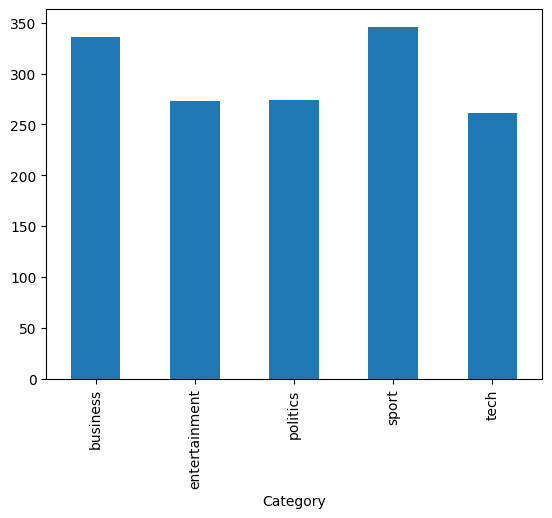

In [9]:
# Visualize on data and preprocessing
news_text['category_id'] = news_text['Category'].factorize()[0]
category_id_df = news_text[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
print(category_to_id)
print(news_text.groupby('Category').category_id.count().plot.bar(ylim=0))
news_text.drop_duplicates(subset=['Category', 'Text'], inplace=True)

In [10]:
# Function to clean the text from whitespaces etc.
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()

    return text


news_text['clean_text'] = news_text['Text'].apply(clean_text).str.replace('bn bn ', '')
news_text['clean_text'] = news_text['Text'].apply(clean_text).str.replace(' bn ', '')

###  Analyse the words

In [11]:
# Below code section is for the see the most 3 correlated words for each category
count_vec = CountVectorizer()
features = count_vec.fit_transform(news_text.clean_text).toarray()
labels = news_text.category_id

N = 3

for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)  # Do chi2 analyses of all items in this category
    indices = np.argsort(
        features_chi2[0])  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names = np.array(count_vec.get_feature_names_out())[
        indices]  # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams = [v for v in feature_names if len(v.split(
        ' ')) == 1]  # List of single word features ( in increasing order of chi-squared stat values)
    print("# '{}':".format(category))
    print("  . Most 3 correlated words in", category, "category:\n       . {}".format(
        '\n       . '.join(unigrams[-N:])))  # Print the words

# 'business':
  . Most 3 correlated words in business category:
       . its
       . bank
       . growth
# 'entertainment':
  . Most 3 correlated words in entertainment category:
       . actor
       . best
       . film
# 'politics':
  . Most 3 correlated words in politics category:
       . election
       . mr
       . labour
# 'sport':
  . Most 3 correlated words in sport category:
       . of
       . cup
       . england
# 'tech':
  . Most 3 correlated words in tech category:
       . technology
       . users
       . mobile


In [12]:
# Below code section is for the see the most 10 correlated words for each category
tfidf_vec = TfidfVectorizer(ngram_range=(1, 2),max_features=10000, use_idf=True)
features2 = tfidf_vec.fit_transform(news_text.clean_text).toarray()

N = 10

for category, category_id in sorted(category_to_id.items()):
    features_chi2_2 = chi2(features2, labels == category_id)  # Do chi2 analyses of all items in this category
    indices2 = np.argsort(
        features_chi2_2[0])  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names2 = np.array(tfidf_vec.get_feature_names_out())[
        indices2]  # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams2 = [v for v in feature_names2 if len(v.split(
        ' ')) == 1]  # List of single word features ( in increasing order of chi-squared stat values)
    print("# '{}':".format(category))
    print("  . Most 10 correlated words for", category, "category:\n       . {}".format(
        '\n       . '.join(unigrams2[-N:])))  # Print the words

# 'business':
  . Most 10 correlated words for business category:
       . firm
       . prices
       . profits
       . economic
       . yukos
       . economy
       . shares
       . growth
       . bank
       . oil
# 'entertainment':
  . Most 10 correlated words for entertainment category:
       . oscar
       . singer
       . award
       . festival
       . awards
       . album
       . best
       . band
       . actor
       . film
# 'politics':
  . Most 10 correlated words for politics category:
       . howard
       . lib
       . brown
       . tories
       . tory
       . mr
       . party
       . election
       . blair
       . labour
# 'sport':
  . Most 10 correlated words for sport category:
       . champion
       . arsenal
       . season
       . win
       . injury
       . coach
       . match
       . chelsea
       . england
       . cup
# 'tech':
  . Most 10 correlated words for tech category:
       . digital
       . phones
       . online
       . c

In [13]:
# Below code section is for the see the most 10 correlated words (whose absence) for each category
for category, category_id in sorted(category_to_id.items()):
    features_chi2_2 = chi2(features2, labels == category_id)  # Do chi2 analyses of all items in this category
    indices2 = np.argsort(
        features_chi2_2[0])  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names2 = np.array(tfidf_vec.get_feature_names_out())[
        indices2]  # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams2 = [v for v in feature_names2 if len(v.split(
        ' ')) == 1]  # List of single word features ( in increasing order of chi-squared stat values)
    print("# '{}':".format(category))
    print("  . Most 10 correlated words (whose absence) for", category, "category:\n       . {}".format(
        '\n       . '.join(unigrams2[:N])))  # Print the words whose absence most strongly predicts the category

# 'business':
  . Most 10 correlated words (whose absence) for business category:
       . headline
       . priority
       . lose
       . reacted
       . massive
       . doubts
       . doors
       . enjoy
       . ends
       . courts
# 'entertainment':
  . Most 10 correlated words (whose absence) for entertainment category:
       . ranking
       . priced
       . pm
       . memories
       . stood
       . vision
       . straight
       . row
       . impression
       . millions
# 'politics':
  . Most 10 correlated words (whose absence) for politics category:
       . keep
       . sit
       . satisfied
       . walked
       . row
       . eastern
       . patrick
       . offensive
       . region
       . shop
# 'sport':
  . Most 10 correlated words (whose absence) for sport category:
       . slump
       . trick
       . self
       . kong
       . classic
       . disc
       . initial
       . poor
       . permission
       . robbie
# 'tech':
  . Most 10 correlate

In [14]:
# Below code section is for the see the most 10 correlated words after stopwords are removed for each category
tfidf_vec2 = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, use_idf=True, stop_words="english")
features3 = tfidf_vec2.fit_transform(news_text.clean_text).toarray()
for category, category_id in sorted(category_to_id.items()):
    features_chi2_3 = chi2(features3, labels == category_id)  # Do chi2 analyses of all items in this category
    indices3 = np.argsort(
        features_chi2_3[0])  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names3 = np.array(tfidf_vec.get_feature_names_out())[
        indices3]  # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams3 = [v for v in feature_names3 if len(v.split(
        ' ')) == 1]  # List of single word features ( in increasing order of chi-squared stat values)
    print("# '{}':".format(category))
    print("  . Most 10 correlated non-stopwords for", category, "category:\n       . {}".format(
        '\n       . '.join(unigrams3[-N:])))  # Print the words

# 'business':
  . Most 10 correlated non-stopwords for business category:
       . keen
       . companies
       . free
       . terms
       . graphics
       . satisfied
       . eminem
       . expressed
       . extraordinary
       . ignore
# 'entertainment':
  . Most 10 correlated non-stopwords for entertainment category:
       . person
       . today
       . otherwise
       . believes
       . theft
       . catalogue
       . adding
       . presley
       . argument
       . arnold
# 'politics':
  . Most 10 correlated non-stopwords for politics category:
       . ryan
       . care
       . ryanair
       . investor
       . meet
       . blow
       . ons
       . public
       . family
       . lucrative
# 'sport':
  . Most 10 correlated non-stopwords for sport category:
       . struck
       . repeated
       . keys
       . car
       . suit
       . clint
       . noon
       . cement
       . finally
       . deaf
# 'tech':
  . Most 10 correlated non-stopwords for t

### K-fold cross-validation/Shuffle

In [15]:
# kFold starts here
news_text = news_text.reindex(np.random.permutation(news_text.index))
news_text = news_text.reset_index(drop=True)

# Our data has length of 1440 which means each fold will be 288 long
fold1 = news_text.loc[0:287]
fold2 = news_text.loc[288:575]
fold3 = news_text.loc[576:863]
fold4 = news_text.loc[864:1151]
fold5 = news_text.loc[1152:1439]


# 5 different train and test values
train_val1 = pd.concat([fold1, fold2, fold3, fold4])
test_val1 = fold5

train_val2 = pd.concat([fold1, fold2, fold3, fold5])
test_val2 = fold4

train_val3 = pd.concat([fold1, fold2, fold4, fold5])
test_val3 = fold3

train_val4 = pd.concat([fold1, fold3, fold4, fold5])
test_val4 = fold2

train_val5 = pd.concat([fold2, fold3, fold4, fold5])
test_val5 = fold1

### More Functions

In [16]:
# Function to print the accuracy, precision and recall scores for each method. It will be used in the next function.
def print_scores(a1, a2, a3, a4, a5,
                 p1, p2, p3, p4, p5,
                 r1, r2, r3, r4, r5):
    acc_avg = (a1 + a2 + a3 + a4 + a5) / 5
    pre_avg = (p1 + p2 + p3 + p4 + p5) / 5
    rec_avg = (r1 + r2 + r3 + r4 + r5) / 5

    print("Accuracy = %.3f" % acc_avg + "   Precision = %.2f" % pre_avg + "   Recall = %.2f" % rec_avg)
    print("")



In [17]:
# Function to run above functions (calculating scores, printing scores)
# Also this function decides which k numbers (1 to 9) will be used according to parameters it will get.
def run_and_print(uni_or_big_or_tf, removed, wtd, scnd):
    if scnd == "no":
        for x in range(1, 4, 2):
            print("Testing for ", uni_or_big_or_tf + " ||| k value for knn is : ", x)
            if removed:
                print("Stopwords are removed")
            else:
                print("Stopwords are not removed")
            # print("k value for knn is : ", x)
            acc1, pre1, rec1 = calculate_scores(train_val1, test_val1, x, uni_or_big_or_tf, removed, wtd)
            acc2, pre2, rec2 = calculate_scores(train_val2, test_val2, x, uni_or_big_or_tf, removed, wtd)
            acc3, pre3, rec3 = calculate_scores(train_val3, test_val3, x, uni_or_big_or_tf, removed, wtd)
            acc4, pre4, rec4 = calculate_scores(train_val4, test_val4, x, uni_or_big_or_tf, removed, wtd)
            acc5, pre5, rec5 = calculate_scores(train_val5, test_val5, x, uni_or_big_or_tf, removed, wtd)

            print_scores(acc1, acc2, acc3, acc4, acc5,
                         pre1, pre2, pre3, pre4, pre5,
                         rec1, rec2, rec3, rec4, rec5)
    elif scnd == "yes":
        for x in range(5, 10, 2):
            print("Testing for ", uni_or_big_or_tf + " ||| k value for knn is : ", x)
            if removed:
                print("Stopwords are removed")
            else:
                print("Stopwords are not removed")
            acc1, pre1, rec1 = calculate_scores(train_val1, test_val1, x, uni_or_big_or_tf, removed, wtd)
            acc2, pre2, rec2 = calculate_scores(train_val2, test_val2, x, uni_or_big_or_tf, removed, wtd)
            acc3, pre3, rec3 = calculate_scores(train_val3, test_val3, x, uni_or_big_or_tf, removed, wtd)
            acc4, pre4, rec4 = calculate_scores(train_val4, test_val4, x, uni_or_big_or_tf, removed, wtd)
            acc5, pre5, rec5 = calculate_scores(train_val5, test_val5, x, uni_or_big_or_tf, removed, wtd)

            print_scores(acc1, acc2, acc3, acc4, acc5,
                         pre1, pre2, pre3, pre4, pre5,
                         rec1, rec2, rec3, rec4, rec5)


### Error Analysis for Classification

In [18]:
# For commenting few misclassified examples
train_val_for = pd.concat([fold1, fold2, fold3, fold4])
test_val_for = fold5

x_tr = train_val_for.clean_text
y_tr = train_val_for.Category
x_st = test_val_for.clean_text
y_st = test_val_for.Category

In [19]:
# Using unigram to see misclassifed examples
vec = CountVectorizer(ngram_range=(1, 1), max_features=100)
vec.fit(x_tr)

X_transformed = vec.transform(x_tr)
X_test_transformed = vec.transform(x_st)

X_transformed = X_transformed.toarray()
X_test_transformed = X_test_transformed.toarray()

clf_for = KNN(k=3)
clf_for.fit(X_transformed, y_tr)

y_pred_class = clf_for.predict(X_test_transformed)

In [20]:
found = 0
for i in range(len(y_pred_class)):
    if not np.equal(y_pred_class[i], y_st.iloc[i]):
        found += 1
        print(str(found) + ". news that misclassified : ")
        print(x_st.iloc[i])
        print("True Value is : " + str(y_st.iloc[i]) + " ||| Prediction was : " + str(y_pred_class[i]))
        print("")
        if found == 3:
            break
print("")

1. news that misclassified : 
microsoft gets the blogging bug software giant microsoft is taking the plunge into the world of blogging it is launching a test service to allow people to publish blogs or online journals called msn spaces microsoft is trailing behind competitors like google and aol which already offer services which make it easy for people to set up web journals blogs short for web logs have become a popular way for people to talk about their lives and express opinions online msn spaces is free to anyone with a hotmail or msn messenger account people will be able to choose a layout for the page upload images and share photo albums and music playlists the service will be supported by banner ads this is a simple tool for people to express themselves said msn s blake irving this is microsoft s first foray into blogging which has taken off as a web phenomenon in the past year competitors like google already offer free services through its blogger site while aol provides its m

#### Comments about misclassified samples  

1 - In the first news there are words like blogs, journals maybe because of that algorithm classified it as entertainment instead of tech.  
2 - Even though second news was about tech, algorithm classified it as business. I think the news is between business and tech
There are lots of words which could be in business category thats why algorithm classified it wrong.  
3 - In the last news i saw words like debt, bill, money. These words helped the algorithm to choose business and i saw lots of words could be related to politics category but all of them could be in different categories, i think that was the reasons that our algorithm misclassified this example.

#### Running all methods

In [22]:
# Function to more organized and run the methods
def run_final(weight, sec):
    run_and_print("unigram", False, weight, sec)
    run_and_print("bigram", False, weight, sec)
    run_and_print("tf-idf", False, weight, sec)
    run_and_print("unigram", True, weight, sec)
    run_and_print("bigram", True, weight, sec)
    run_and_print("tf-idf", True, weight, sec)


# Function to be more organized and run the best 2 methods
def run_best2(weight, sec):
    run_and_print("tf-idf", False, weight, sec)
    run_and_print("tf-idf", True, weight, sec)


In [23]:
weighted = "no"  # To use KNN algorithm
secondTime = "no"  # only for 1 to 3 k values
run_final(weighted, secondTime)  # run all methods

Testing for  unigram ||| k value for knn is :  1
Stopwords are not removed
Accuracy = 0.838   Precision = 0.60   Recall = 0.60

Testing for  unigram ||| k value for knn is :  3
Stopwords are not removed
Accuracy = 0.850   Precision = 0.63   Recall = 0.63

Testing for  bigram ||| k value for knn is :  1
Stopwords are not removed
Accuracy = 0.785   Precision = 0.46   Recall = 0.46

Testing for  bigram ||| k value for knn is :  3
Stopwords are not removed
Accuracy = 0.788   Precision = 0.47   Recall = 0.47

Testing for  tf-idf ||| k value for knn is :  1
Stopwords are not removed
Accuracy = 0.956   Precision = 0.89   Recall = 0.89

Testing for  tf-idf ||| k value for knn is :  3
Stopwords are not removed
Accuracy = 0.960   Precision = 0.90   Recall = 0.90

Testing for  unigram ||| k value for knn is :  1
Stopwords are removed
Accuracy = 0.892   Precision = 0.73   Recall = 0.73

Testing for  unigram ||| k value for knn is :  3
Stopwords are removed
Accuracy = 0.896   Precision = 0.74   Rec

In [24]:
print("--- Now for weighted knn algorithm ---")
print("")
weighted = "yes"  # To use weighted KNN algorithm
run_final(weighted, secondTime)  # run all methods with weighted

--- Now for weighted knn algorithm ---

Testing for  unigram ||| k value for knn is :  1
Stopwords are not removed
Accuracy = 0.838   Precision = 0.60   Recall = 0.60

Testing for  unigram ||| k value for knn is :  3
Stopwords are not removed
Accuracy = 0.855   Precision = 0.64   Recall = 0.64

Testing for  bigram ||| k value for knn is :  1
Stopwords are not removed
Accuracy = 0.785   Precision = 0.46   Recall = 0.46

Testing for  bigram ||| k value for knn is :  3
Stopwords are not removed
Accuracy = 0.790   Precision = 0.48   Recall = 0.48

Testing for  tf-idf ||| k value for knn is :  1
Stopwords are not removed
Accuracy = 0.956   Precision = 0.89   Recall = 0.89

Testing for  tf-idf ||| k value for knn is :  3
Stopwords are not removed
Accuracy = 0.960   Precision = 0.90   Recall = 0.90

Testing for  unigram ||| k value for knn is :  1
Stopwords are removed
Accuracy = 0.892   Precision = 0.73   Recall = 0.73

Testing for  unigram ||| k value for knn is :  3
Stopwords are removed
A

In [25]:
# After the results we have seen that we got the best accuracies from tf-idf and tf-idf when stopwords are removed.
print("--- Now for best 2 methods ---")
print("")
weighted = "no"  # To use KNN algorithm with best 2 method
secondTime = "yes"  # only for 5 to 9 k values
run_best2(weighted, secondTime)  # run best 2 methods

--- Now for best 2 methods ---

Testing for  tf-idf ||| k value for knn is :  5
Stopwords are not removed
Accuracy = 0.967   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  7
Stopwords are not removed
Accuracy = 0.969   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  9
Stopwords are not removed
Accuracy = 0.968   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  5
Stopwords are removed
Accuracy = 0.969   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  7
Stopwords are removed
Accuracy = 0.969   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  9
Stopwords are removed
Accuracy = 0.971   Precision = 0.93   Recall = 0.93



In [26]:
print("--- Now for best 2 methods with weighted ---")
print("")
weighted = "yes"  # To use weighted KNN algorithm with best 2 method
run_best2(weighted, secondTime)  # run best 2 methods

--- Now for best 2 methods with weighted ---

Testing for  tf-idf ||| k value for knn is :  5
Stopwords are not removed
Accuracy = 0.967   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  7
Stopwords are not removed
Accuracy = 0.968   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  9
Stopwords are not removed
Accuracy = 0.968   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  5
Stopwords are removed
Accuracy = 0.970   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  7
Stopwords are removed
Accuracy = 0.969   Precision = 0.92   Recall = 0.92

Testing for  tf-idf ||| k value for knn is :  9
Stopwords are removed
Accuracy = 0.971   Precision = 0.93   Recall = 0.93



In [3]:
results = pd.read_excel('results_part1.xlsx')
print(results)

FileNotFoundError: [Errno 2] No such file or directory: 'results_part1.xlsx'

We can see from the results:  

We got the best accuracy with TF-IDF vectorizer when stopwords are removed and k was equal to 7.  
In above scenario knn and weighted knn algorithm gave us similar accuracies.

We got the worst accuracy with bigram when stopwords are not removed and k was equal to 1.  
Again in above scenario both algorithms gave us similar accuracies.  

From the results we saw that increasing k value doesn't have big impact on accuracies.  
But removing stopwords slightly increases accuracy on all of methods.  

In conclusion, we should use tf-idf vectorizer when working with this dataset for text classification.


# PART2

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
#Imported these libraries to compare my results with ready methods
from sklearn.model_selection import KFold
from sklearn import neighbors

c:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preprocessing

In [2]:
#Reading Data
data = pd.read_csv('insurance.csv')

In [3]:
#Checking data shape
rows,columns = data.shape
print(f"Number of rows/examples: {rows}")
print(f"Number of columns/features: {columns}")

Number of rows/examples: 1338
Number of columns/features: 7


In [4]:
#some examples from data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#checking null values and type of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
le = LabelEncoder()
#changing type from object to int
sex = le.fit_transform(data["sex"])
data["sex"] = sex
# Print the dtype for checking the transformation
print(data["sex"].dtype)

int32


In [7]:
#changing type from object to int
smoker = le.fit_transform(data["smoker"])
data["smoker"] = smoker
# Print the dtype for checking the transformation
print(data["smoker"].dtype)

int32


In [8]:
#separating region to each reigon as a feature
data = pd.get_dummies(data, columns = ['region']) 
print(data)

      age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400                 0   
1      18    1  33.770         1       0   1725.55230                 0   
2      28    1  33.000         3       0   4449.46200                 0   
3      33    1  22.705         0       0  21984.47061                 0   
4      32    1  28.880         0       0   3866.85520                 0   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    1  30.970         3       0  10600.54830                 0   
1334   18    0  31.920         0       0   2205.98080                 1   
1335   18    0  36.850         0       0   1629.83350                 0   
1336   21    0  25.800         0       0   2007.94500                 0   
1337   61    0  29.070         0       1  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                

## MAE Function

In [9]:

#Calculates the Mean Absolute Error
#y_pred is predicted(inference) value, y is actual value
def MAE(y_pred, y):
    if len(y_pred.shape) > 1:
        #squeeze deletes shape one shape dimension
        y_pred = y_pred.squeeze()
    mae = np.absolute(np.subtract(y_pred, y)).mean() 
    return mae

# Ready Methods
This part has codes for calculating MAE with ready methods.
I use results of this part to compare the results of my methods.

In [10]:
#All the k values for KNN 
K = [1,3,5,7,9]

In [11]:
def knn(data,weighted,normalize):
    
    #choose n_splits 
    kf = KFold(n_splits=5)
    mae_val = [] #to store maealues for different k
    
    print(f"model is weighted knn {weighted}")  
    print(f"normalized is {normalize}")
    
    for k in K:
        #choose model
        if(weighted):
            model = neighbors.KNeighborsRegressor(n_neighbors = k,weights="distance")
        else:
            model = neighbors.KNeighborsRegressor(n_neighbors = k)

        #use that for normalization
        if(normalize):
            data = (data-data.min())/(data.max()-data.min())

        y = data["charges"]
        X = data.drop("charges",axis=1)
   
        for train, test in kf.split(X):
            X_train, X_test = X.iloc[train], X.iloc[test]
            y_train, y_test = y.iloc[train], y.iloc[test]

            model.fit(X_train, y_train)  #fit the model
            pred=model.predict(X_test) #make prediction on test set
            error = MAE(y_test,pred) #calculate mae
            mae_val.append(error) #store mae values
        mae_mean = np.array(mae_val).mean()
        print(f"k is {k} , mean mae is {mae_mean}")
    

In [12]:
#weighted, normalize
knn(data,False,False)

model is weighted knn False
normalized is False
k is 1 , mean mae is 7349.297019918624
k is 3 , mean mae is 7346.283739437819
k is 5 , mean mae is 7512.551345806799
k is 7 , mean mae is 7642.497147353572
k is 9 , mean mae is 7739.332423096279


In [13]:
knn(data,False,True)

model is weighted knn False
normalized is True


k is 1 , mean mae is 0.057173841875935286
k is 3 , mean mae is 0.05687861258364607
k is 5 , mean mae is 0.05724838376489897
k is 7 , mean mae is 0.05773967115232039
k is 9 , mean mae is 0.05817798063008617


In [14]:
knn(data,True,False)

model is weighted knn True
normalized is False


k is 1 , mean mae is 7349.297019918624
k is 3 , mean mae is 7291.247741557056
k is 5 , mean mae is 7409.2820840541735
k is 7 , mean mae is 7511.367198457624
k is 9 , mean mae is 7594.47001813742


In [15]:
knn(data,True,True)

model is weighted knn True
normalized is True
k is 1 , mean mae is 0.057173841875935286
k is 3 , mean mae is 0.05576452998078232
k is 5 , mean mae is 0.05549190666126338
k is 7 , mean mae is 0.0555658417422331
k is 9 , mean mae is 0.05572449899584332


## 5-fold Cross Validation

In [16]:
#Creates the fold of given index then returns train x, train y, test x, test y of that fold as a numpy array
def create_splits(data, fold_index):
    fold_size = len(data) // 5
    start = fold_index * fold_size
    end = start + fold_size

    test_fold = data.loc[start:end]
    train_folds = [data.loc[:start - 1], data.loc[end + 1:]]

    train_set = pd.concat(train_folds)
    test_set = test_fold

    train_set_x = train_set.drop("charges",axis=1)
    train_set_y = train_set["charges"]
    test_set_x = test_set.drop("charges",axis=1) 
    test_set_y = test_set["charges"]

    return train_set_x.to_numpy(), test_set_x.to_numpy(), train_set_y.to_numpy(), test_set_y.to_numpy()


## KNN


In [17]:
#Calculates and returns the euclidean distance between to points
def euclidean_distance(point1, point2):
   
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

In [18]:
#KNN class for implementing both knn and weighted knn
class KNN:
    #Constructor takes k of knn and weighted for the knn as a parameter
    def __init__(self, k=3, weighted=False):
        self.k = k
        self.weighted = weighted
        
    #fits the data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    #predict target values of given X array
    def predict(self, X):
        predictions = np.array([])
        for x in X:
            predictions = np.append(predictions, self._predict(x))
        return predictions
    
    #predict the target value of given x
    def _predict(self, x):
        distances = np.array([])
        #calculate the distances to other points in X
        for x_train in self.X_train:
            distance = euclidean_distance(x, x_train)
            distances = np.append(distances, distance)

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = np.array([])
        #find the nearest k points
        for i in k_indices:
            k_nearest_labels = np.append(k_nearest_labels, self.y_train[i])
        # if not weighted knn return the mean of the sum of k nearest point values 
        if not self.weighted:
            return np.mean(k_nearest_labels)
        # if weighted calculate weights using distances
        else:
            weights = 1 / (distances[k_indices] + 1e-6)  # Adding a small constant to avoid division by zero
            weighted_values = k_nearest_labels * weights
            return np.sum(weighted_values) / np.sum(weights)

## Running the KNN

In [19]:
# takes data, k of knn, weighted true or false, normalize true or false
def knn(data,_k,_weighted,_normalize):
    #create the model
    model = KNN(k=_k, weighted=_weighted)
    
    print(f"k is {_k}, weighted is {_weighted}, normalized is {_normalize}")
    #if normalize is true use min max normalization on data
    if(_normalize):
        data = (data-data.min())/(data.max()-data.min())
    mae_val = [] #to store maealues for different k
    
    for i in range(5):
        #for each fold
        x_train, x_test, y_train, y_test = create_splits(data,i)

        model.fit(x_train, y_train)  #fit the model
        pred=model.predict(x_test) #make prediction on test set
        error = MAE(y_test,pred) #calculate mae
        mae_val.append(error) #store mae values
        
    #Calculating mean value of sum of each folds mae    
    mae_mean = np.array(mae_val).mean()
    print(f"k is {model.k}, mean mae is {mae_mean}")
        
    

In [20]:
K = [1,3,5,7,9]
for i in K:
    knn(data,i,False,False)
    knn(data,i,False,True)
    knn(data,i,True,False)
    knn(data,i,True,True)
    print("")


k is 1, weighted is False, normalized is False


k is 1, mean mae is 7416.003659417911
k is 1, weighted is False, normalized is True
k is 1, mean mae is 0.05675421611548097
k is 1, weighted is True, normalized is False
k is 1, mean mae is 7416.003659417911
k is 1, weighted is True, normalized is True
k is 1, mean mae is 0.05675421611548096

k is 3, weighted is False, normalized is False
k is 3, mean mae is 7375.982229020398
k is 3, weighted is False, normalized is True
k is 3, mean mae is 0.056393445061037516
k is 3, weighted is True, normalized is False
k is 3, mean mae is 7263.249088005623
k is 3, weighted is True, normalized is True
k is 3, mean mae is 0.054223095421717174

k is 5, weighted is False, normalized is False
k is 5, mean mae is 7853.88830949612
k is 5, weighted is False, normalized is True
k is 5, mean mae is 0.05768014183123209
k is 5, weighted is True, normalized is False
k is 5, mean mae is 7654.10003434004
k is 5, weighted is True, normalized is True
k is 5, mean mae is 0.0547163295637893

k is 7, weighted is False

# Error Analysis for Regression

## Overview

In this part of the assignment, the goal is to implement a nearest neighbor algorithm for estimating medical insurance costs. The dataset used for this task contains 1338 samples with continuous medical cost values. The features include age, sex, BMI, number of children, smoking status, and region. The implemented algorithm is extended to include a weighted k-NN approach.

## Implementation Details

### 1. Data Loading and Preprocessing

The dataset was downloaded from the provided link and loaded into a Pandas DataFrame.  
  
The info() method was utilized to inspect null values and the types of features in the dataset.  
  
Object type features, such as 'sex' and 'smoker', were encoded using the LabelEncoder from scikit-learn to int.  
  
The 'region' feature was transformed using one-hot encoding, creating individual binary features for each region.  

### 2. MAE Function

The Mean Absolute Error (MAE) is a crucial metric for evaluating the performance of the regression model. It quantifies the average absolute difference between the predicted and actual values.  
  
This function takes the predicted values (y_pred) and the actual values (y) as inputs and computes the mean absolute difference between them. It is a reliable measure of how well the model is performing in estimating medical insurance costs.  
  
The MAE values will be utilized to assess and compare the performance of different k-NN and weighted k-NN models.

### 3. 5-fold Cross Validation

A 5-fold cross-validation method was applied to measure the performance of the model.  
This method creates the fold of given index then returns train x, train y, test x, test y of that fold as a numpy array.  

### 4. KNN 

#### k-NN Algorithm

The k-NN algorithm for regression was implemented using Euclidean distance as the distance metric. 

#### Weighted k-NN Algorithm

An extension of the k-NN algorithm, the weighted k-NN algorithm, was implemented. This approach assigns different weights to neighbors based on their distance, giving more influence to closer neighbors.

### 5. K-NN Algorithm Implementation

The knn function implements the k-NN algorithm for medical insurance cost estimation. It takes the dataset (data), the number of neighbors (_k), a boolean flag for weighted k-NN (_weighted), and a boolean flag for feature normalization (_normalize) as input.

Steps:  
1.Model Initialization:  
A k-NN model is created using the provided parameters.  
  
2.Data Normalization:  
If _normalize is set to True, min-max normalization is applied to the dataset.  
  
3.5-Fold Cross-Validation:  
The model is trained and evaluated using 5-fold cross-validation.  
Mean Absolute Error (MAE) values are calculated for each fold.  
  
4.Performance Analysis:  
The mean MAE value across all folds is computed.  
Results, including the values of k, whether the algorithm is weighted, and   whether normalization is applied, are printed for analysis.  

## Results

In [21]:
#Some results that I have saved before
results = pd.read_excel('results_part2.xlsx')
display(results)

,k values of knn,k=1,k=3,k=5,k=7,k=9
0,knn ready method,7349.297010,7346.28373,7512.55134,7642.49714,7739.332420
1,knn my implementation,7416.003650,7375.98222,7853.88830,8040.86230,8140.105924
2,knn ready method normalized,0.057170,0.05687,0.05724,0.05773,0.058170
3,knn my implementation normalized,0.056754,0.05639,0.05768,0.05905,0.059820
4,weighted knn ready method,7349.297010,7291.24774,7409.28200,7511.36719,7594.470010
5,weighted knn my implementation,7416.003650,7263.24908,7654.10003,7828.14601,7941.339460
6,weighted knn ready method normalized,0.057170,0.05576,0.05549,0.05556,0.055720
7,weighted knn my implementation normalized,0.056754,0.05422,0.05471,0.05567,0.056236


As seen in the results,  
  
In both unnormalized and normalized results, the ready method demonstrates slightly better performance.  
Normalized results are significantly less than unnormalized data mae value. That suggests normalization of the data is a must for better results.  
Lesser the mae means better the accuracy of the model.  
  
For knn ready method best k value is 3  
For knn my implementation best k value is 3  
For knn ready method normalized best k value is 3  
For knn my implementation normalized best k value is 3  
For weighted knn ready method best k value is 3  
For weighted knn my implementation best k value is 3  
For weighted knn ready method normalized best k value is 5  
For weighted knn my implementation normalized best k value is 3  
On average best k value for this data is 3  
  
Lowest error has observed for weighted knn in my implementation with normalized data for k=3 , with the mae error 0.05422.    


